# House Prediction and Price 
- Steps Inculuded in the follwoing
    - Data understanding 
    - Data exploration
    - Data Cleaning 
    - Data Preparing
    - Model Biulding and Evaluation

In [1]:
# Calling neccesaary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
category = df.select_dtypes('object')
print(list(category))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [6]:
null_df = round(df.isnull().sum()/len(df)*100,2)
null_df[null_df > 0.0000]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [7]:
print(df['LotFrontage'].value_counts())
print(df['MasVnrArea'].value_counts())
print(df['GarageYrBlt'].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 -  since there are features where NAN values have some meaning like wither the value are not present in like Pool QC-  Nan means wither pool is not available so will be replacing Nan values with None so that it will be easy


In [9]:
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [10]:
for i in null_has_meaning:
    df[i].fillna('None', inplace= True)
    df[i].fillna('None', inplace= True)

In [11]:
# imputing Nan values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="Median")

<Figure size 1080x360 with 0 Axes>

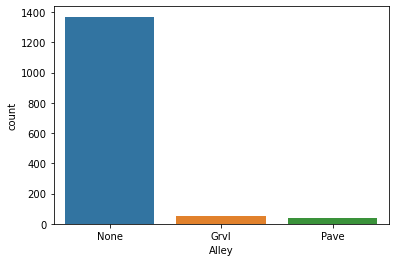

<Figure size 1080x360 with 0 Axes>

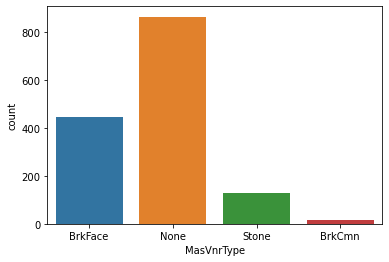

<Figure size 1080x360 with 0 Axes>

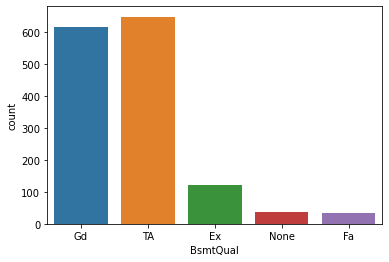

<Figure size 1080x360 with 0 Axes>

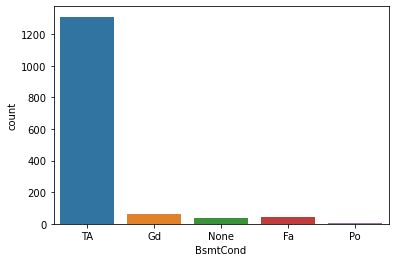

<Figure size 1080x360 with 0 Axes>

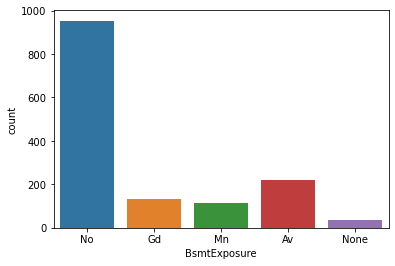

<Figure size 1080x360 with 0 Axes>

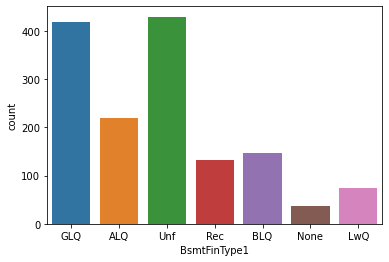

<Figure size 1080x360 with 0 Axes>

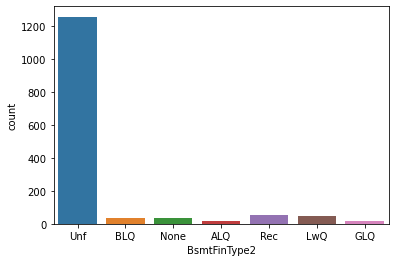

<Figure size 1080x360 with 0 Axes>

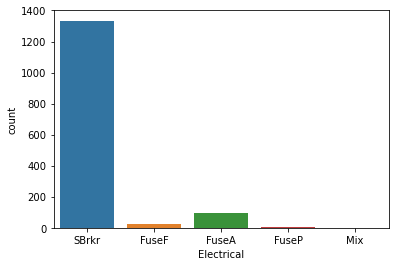

<Figure size 1080x360 with 0 Axes>

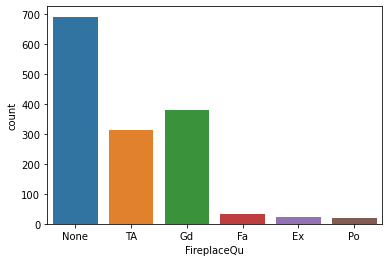

<Figure size 1080x360 with 0 Axes>

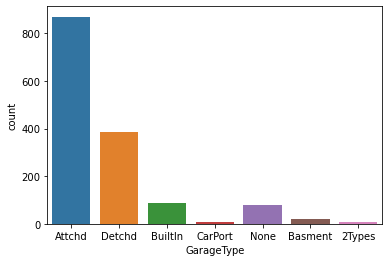

<Figure size 1080x360 with 0 Axes>

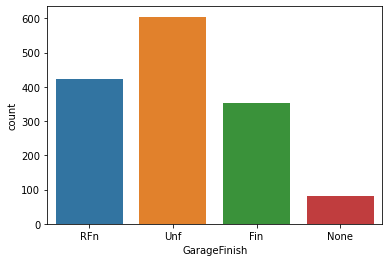

<Figure size 1080x360 with 0 Axes>

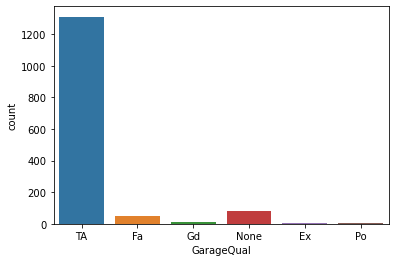

<Figure size 1080x360 with 0 Axes>

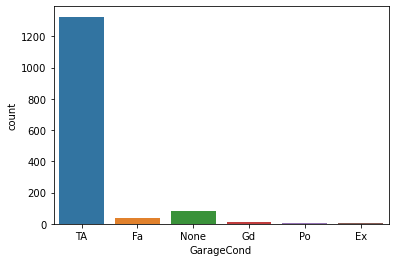

<Figure size 1080x360 with 0 Axes>

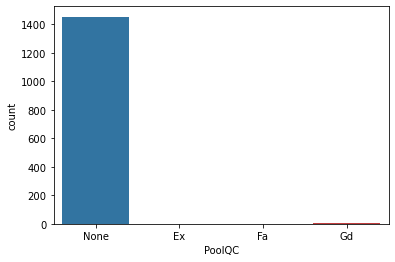

<Figure size 1080x360 with 0 Axes>

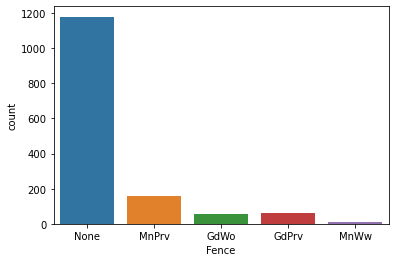

<Figure size 1080x360 with 0 Axes>

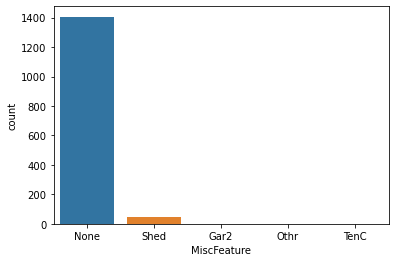

In [12]:
var_list = ["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

for j in var_list:
    plt.figure(figsize = (15,5))
    fig, ax = plt.subplots()
    sns.countplot(df[j])
    

In [13]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False).head(10)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
SalePrice       0.00
ExterCond       0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
dtype: float64

#### Since 'LotFrontage' after replacing the values with None vaues we still have 17.74 missing values which is a high number so better remove the column

In [14]:
df.drop("LotFrontage",axis= 1, inplace=True)

In [15]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace= True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace= True)
df['MasVnrType'].fillna("None", inplace= True)

In [16]:
round(df.isnull().sum(),2).sort_values(ascending = False).head(10)

Electrical     1
SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
ExterCond      0
dtype: int64

 - Since we have left with one single null value we can drop the row and then can have the clean dataset


In [17]:
df.dropna( inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

#### So we have left with clean dataset and ready to use

In [19]:
types_train = df.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)]
numerical_dt = list(num_train.index)
print(numerical_dt)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [20]:
categorical_dt = df.select_dtypes('object')
print(list(categorical_dt))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


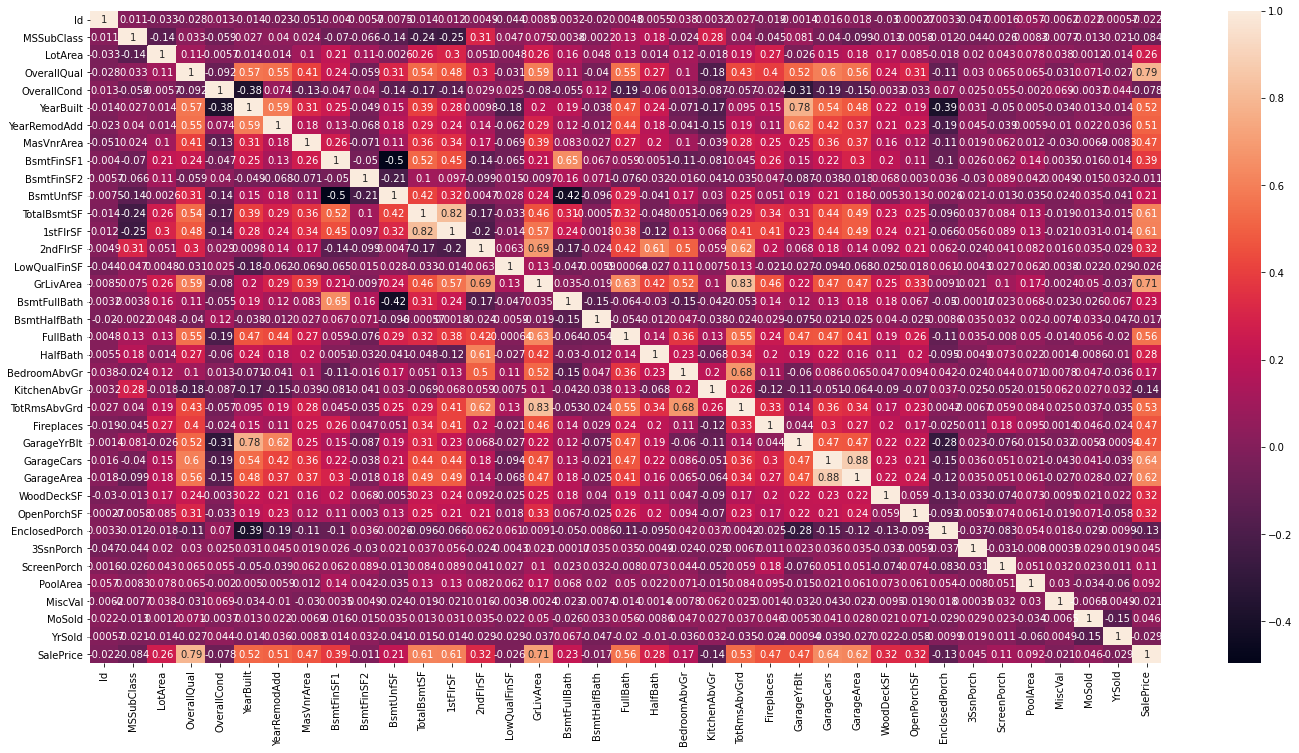

In [21]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True)

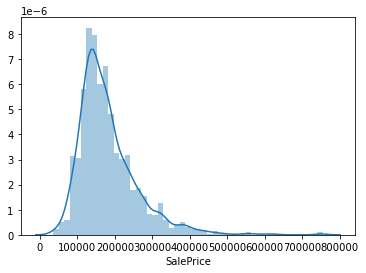

In [22]:
sns.distplot(df['SalePrice'])

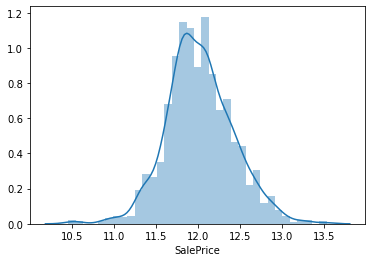

In [23]:
sns.distplot(np.log(df['SalePrice']))

In [24]:
df["Transformed_SalePrice"] = np.log(df['SalePrice'])

In [25]:
for i in categorical_dt:
    feature_set = set(df[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df.loc[df[i] == j, i] = feature_list.index(j)

In [26]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Transformed_SalePrice
0,1,60,1,8450,0,0,3,1,0,4,...,0,4,4,0,2,2008,6,1,208500,12.247694
1,2,20,1,9600,0,0,3,1,0,3,...,0,4,4,0,5,2007,6,1,181500,12.109011
2,3,60,1,11250,0,0,1,1,0,4,...,0,4,4,0,9,2008,6,1,223500,12.317167
3,4,70,1,9550,0,0,1,1,0,2,...,0,4,4,0,2,2006,6,0,140000,11.849398
4,5,60,1,14260,0,0,1,1,0,3,...,0,4,4,0,12,2008,6,1,250000,12.429216


In [27]:
# Also needs to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Model Building 

In [28]:
X = df.drop(["Id","SalePrice","Transformed_SalePrice"],axis=1)
y = df["Transformed_SalePrice"]

In [29]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [30]:
# Split the data into train test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state =100)

In [48]:
# list of parameter to tune 
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [49]:
# import relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import r2_score

In [50]:
#Applying LAsso
lasso = Lasso()

# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator= lasso,
                       param_grid= params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose= 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017936,0.007988,0.003799,0.002126,0.0001,{'alpha': 0.0001},-0.082816,-0.102624,-0.099808,-0.101224,...,-0.096356,0.007202,2,-0.087133,-0.082959,-0.076087,-0.085368,-0.083123,-0.082934,0.003754
1,0.012747,0.002557,0.003406,0.000499,0.001,{'alpha': 0.001},-0.084999,-0.104115,-0.099396,-0.097849,...,-0.095789,0.006531,1,-0.089075,-0.084441,-0.078142,-0.085314,-0.085286,-0.084452,0.003539
2,0.010771,0.000399,0.003191,0.000399,0.01,{'alpha': 0.01},-0.097428,-0.106776,-0.103946,-0.095910,...,-0.099597,0.004918,3,-0.096616,-0.093976,-0.089422,-0.088664,-0.095053,-0.092746,0.003147
3,0.021870,0.004419,0.003592,0.000799,0.05,{'alpha': 0.05},-0.102683,-0.120552,-0.117454,-0.117192,...,-0.112012,0.007913,4,-0.108394,-0.106225,-0.102040,-0.103484,-0.107798,-0.105588,0.002457
4,0.029315,0.013527,0.003878,0.001276,0.1,{'alpha': 0.1},-0.104300,-0.126501,-0.124703,-0.122133,...,-0.117162,0.009111,7,-0.115747,-0.110960,-0.107181,-0.106478,-0.114172,-0.110908,0.003676


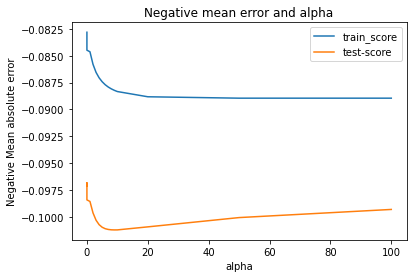

In [138]:
# plotting mean and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

#plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean absolute error')

plt.title('Negative mean error and alpha')
plt.legend(['train_score','test-score'], loc= 'upper right')
plt.show()

In [142]:
lasso = Lasso(alpha=0.030)
lasso.fit(X_train,y_train)

Lasso(alpha=0.03)

In [143]:
lasso.coef_

array([-7.31892890e-04, -0.00000000e+00,  2.10772597e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.24534483e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.96624932e-02,
        1.53069516e-02,  3.33144570e-03,  2.55096976e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.53525564e-04,  0.00000000e+00,
       -5.83400199e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        8.98275043e-05, -0.00000000e+00,  4.71243571e-05,  8.65069076e-06,
        7.80216982e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.87819701e-04,  2.26828518e-04,  1.51209343e-04,
        8.49103010e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [144]:
y_train_pred_l=lasso.predict(X_train)
print("Train R2 score",r2_score(y_train,y_train_pred_l))

Train R2 score 0.8479428525453957


In [145]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns.tolist()
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [146]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,const,0.966492
16,OverallQual,0.049662
17,OverallCond,0.015307
18,YearBuilt,0.003331
11,Neighborhood,0.003245
19,YearRemodAdd,0.002551
23,Exterior2nd,0.000554
69,ScreenPorch,0.000362
68,3SsnPorch,0.000283
67,EnclosedPorch,0.000244


In [136]:
lasso_coef.sort_values(by='Coef',ascending=False).tail(10)

,Featuere,Coef
78,SaleCondition,0.000000e+00
28,Foundation,0.000000e+00
27,ExterCond,0.000000e+00
26,ExterQual,0.000000e+00
74,MiscVal,-2.428609e-07
25,MasVnrArea,-5.834002e-07
66,OpenPorchSF,-8.537160e-05
1,MSSubClass,-7.318929e-04
58,GarageYrBlt,-8.420668e-04
70,PoolArea,-1.801810e-03


In [137]:
#Predecting the values for Test set
y_test_pred_l=lasso.predict(X_test)
print("Test R2 score",r2_score(y_test,y_test_pred_l))

Test R2 score 0.7644403949377283


In [55]:
# Applying Ridge
ridge = Ridge()

# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator= ridge,
                       param_grid= params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose= 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014827,0.004141,0.006943,0.000673,0.0001,{'alpha': 0.0001},-0.083343,-0.102773,-0.099946,-0.103268,...,-0.097099,0.007327,6,-0.086984,-0.082750,-0.075936,-0.085447,-0.083008,-0.082825,0.003786
1,0.014282,0.003479,0.005974,0.002000,0.001,{'alpha': 0.001},-0.083339,-0.102773,-0.099948,-0.102923,...,-0.097029,0.007272,5,-0.086986,-0.082752,-0.075937,-0.085450,-0.083010,-0.082827,0.003786
2,0.015326,0.003034,0.005825,0.001145,0.01,{'alpha': 0.01},-0.083301,-0.102775,-0.099969,-0.102195,...,-0.096882,0.007176,3,-0.087010,-0.082776,-0.075950,-0.085456,-0.083030,-0.082844,0.003788
3,0.014187,0.003680,0.005568,0.000544,0.05,{'alpha': 0.05},-0.083134,-0.102788,-0.100070,-0.101956,...,-0.096827,0.007215,2,-0.087114,-0.082890,-0.076011,-0.085459,-0.083148,-0.082925,0.003790
4,0.009144,0.000987,0.003986,0.000631,0.1,{'alpha': 0.1},-0.082947,-0.102809,-0.100205,-0.101894,...,-0.096813,0.007292,1,-0.087249,-0.083030,-0.076089,-0.085461,-0.083297,-0.083025,0.003793


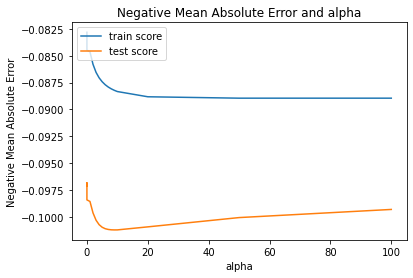

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [77]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.41066046e-04,  1.22030235e-02,  1.90875703e-06, -5.84778382e-02,
        8.84659171e-04, -8.28406518e-03, -2.67866774e-02, -9.85384656e-03,
       -6.67833410e-03,  2.51161206e-02,  3.60485416e-03, -1.77069103e-03,
       -7.96589402e-02,  3.48785595e-02,  6.14018676e-03,  6.49608000e-02,
        4.09045725e-02,  2.26965583e-03,  1.17007842e-03,  2.85510093e-03,
        4.30091862e-03,  1.19275618e-03,  6.14213363e-04, -4.38636392e-04,
       -1.04630108e-06,  1.21194886e-02,  2.27621764e-04,  5.79851203e-03,
       -1.43168820e-02,  1.55421597e-02,  1.39334926e-02, -8.65863825e-03,
        3.48714208e-05, -3.64359717e-03,  2.28445171e-05,  1.64577468e-05,
        7.41736804e-05, -1.10301966e-02, -9.60720300e-03,  5.37575453e-02,
       -8.82719769e-04,  2.69362730e-05,  7.97277658e-05,  5.38069142e-05,
        1.60470948e-04,  5.03782872e-02,  1.60393693e-02,  3.23740894e-02,
        2.61704904e-02, -2.06010096e-03, -6.49710870e-02, -8.11995026e-03,
        7.78710733e-03,  

In [78]:
y_train_pred=ridge.predict(X_train)
print("Train R2 score",r2_score(y_train,y_train_pred))

Train R2 score 0.8995222430565742


In [79]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.1}

In [80]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns.tolist()
cols.insert(0, 'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Features,Coef
0,const,17.523896
16,OverallQual,0.064961
40,CentralAir,0.053758
60,GarageCars,0.052948
46,BsmtFullBath,0.050378
55,Fireplaces,0.042665
17,OverallCond,0.040905
73,MiscFeature,0.036927
14,BldgType,0.034879
48,FullBath,0.032374


In [81]:
ridge_coef.sort_values(by='Coef',ascending=False).tail(10)

,Features,Coef
63,GarageCond,-0.008701
39,HeatingQC,-0.009607
8,Utilities,-0.009854
38,Heating,-0.011030
29,BsmtQual,-0.014317
7,LandContour,-0.026787
4,Street,-0.058478
51,KitchenAbvGr,-0.064971
13,Condition2,-0.079659
71,PoolQC,-0.239310


In [82]:
#Predecting the values for test set
y_test_pred=ridge.predict(X_test)
print("Test R2 score",r2_score(y_test,y_test_pred))

Test R2 score 0.8020749565295441
